<h1> Bitcoin Stock Portfolio</h1><img src="../docs/kanchanara-dRgxo-ujT2U-unsplash.jpg" height=650px width=1250px>
Photo by <a href="https://unsplash.com/@kanchanara?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Kanchanara</a> on <a href="https://unsplash.com/photos/gold-and-black-round-star-print-dRgxo-ujT2U?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  

## Background

Bitcoin was first introduced in a whitepaper titled "Bitcoin: A Peer-to-Peer Electronic Cash System" published in 2008 by an unknown entity that is identified by the name Satoshi Nakamoto. What was proposed in this whitepaper was a decentralized digital currency that could be transferred electronically without the need for a central authoruty, like central banks. The launch of the Bitcoin network began when Satoshi first mined a block of Bitcoin, known as the Genesis Block in January 2009. Its first transaction occured when a programmer purchased two pizzas using 10,000 Bitcoins in May 2010. This is known today as the most expensive pizza order in history. Although Bitcoin struggled due to its volatility, it has attracted interest from investors, financial institutions, and tech companies, leading to a robust ecosystem around cryptocurrencies and blockchain technologies. Botcoin has inspired the creation of thousands of alternative cryptocurrencies, fueling discussions of the future of money, finance and decentralization. This is Bitcoin's journey as a transformative force in the world of finance and technology.

S&P 500 was created in 1957 by a financial services company named Standard & Poor's, which is today called S&P Global. By design, it measures the performance of the 500 leading companies from various sectors, such as technology, healthcare, consumer goods, and financial services. Its key feature is its market capitalization weighting methodology which results in companies with higher market capitalization having a greater influence on the index's performance. This means larger companies like Google, Apple and Microsoft have a greater impact on the index compared to smaller companies. Many investors and financial professionals use the S&P 500 as a reference point to evaluate the performance of their portfolios or investment strategies. With its long history of the US economy, it makes it a great tool to assess market trends and make investment decisions. Changes in the value of the S&P 500 are closely watched by investors, economists, and policymakers as an indicator of the overall health of the US economy. Movements in the index can influence investor sentiment, market trends, and economic forecasts, making it a key barometer of market performance and investor confidence.

One of the most significant events in the history of gold is the California Gold Rush of 1848-1855, which led to a massive influx of prospectors seeking their fortunes in the gold fields of California. This event not only transformed the region but also had a lasting impact on the global economy. Gold has been used as a form of currency and a store of value for centuries. The first U.S. gold coin was struck in 1787, marking the beginning of the country's gold coinage. In the modern era, gold continues to be highly valued for its use in jewelry, electronics, and as a hedge against economic uncertainty. Central banks and investors around the world hold significant amounts of gold as a reserve asset.

The Consumer Price Index (CPI) is a crucial tool for measuring inflation and price changes in an economy. By tracking the average change in prices paid by consumers for a basket of goods and services over time, the CPI provides valuable insights into the cost of living and purchasing power. The CPI is calculated using a weighted average of prices for a diverse range of goods and services commonly purchased by consumers, such as food, housing, transportation, and healthcare. Changes in these prices are reflected in the CPI to gauge overall inflation levels. Economists, policymakers, and investors closely monitor the CPI to assess the impact of price changes on consumers, businesses, and the broader economy. Inflation trends derived from the CPI influence monetary policy decisions, wage negotiations, and investment strategies. The CPI serves as a valuable tool for adjusting wages, pensions, and government benefits to account for changes in the cost of living. It also helps individuals and businesses make informed financial decisions based on prevailing inflation rates.

## Problem Statement

The CFO of Investment Fund International is looking to diversify their portfolio further and they do not know much about the performance of Bitcoin. They are looking for a hedge against losses incase the traditional assets lose value. I plan to give a full analysis on Bitcoin's performance against indices like the S&P 500, Gold price and the Consumer Price Index (CPI). After this analysis, I will give recommendations to the CFO of whether Bitcoin is worth investing in or not.

## About the data

#### Bitcoin daily data in US dollars
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the price at the beginning of the trading day
- "high" - the highest price reached that day
- "low" - the lowest price reached that day
- "close" - the price at the closing of the trading day
- "volume" - how many Bitcoin were traded that day

#### S&P 500 daily data
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the index level at the beginning of the trading day
- "high" - the highest level reached that day
- "low" - the lowest level reached that day
- "close" - the level at the closing of the trading day
- "volume" - how many shares in the companies that make up the index were traded that day

#### inflation and gold as monthly data
- "date" - date from September, 2014 to November, 2021
- "gold_usd" - price in usd of gold for that month
- "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

_CPI data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/). Publicly available information_.

## 1.0 Import Libraries

In [1]:
#For dataframe and array manipulation
import pandas as pd
import numpy as np
#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 2.0 Import data

In [2]:
#Importing and previewing the first 5 rows of Bitcoin data
bitcoin = pd.read_csv('../data/bitcoin-usd.csv', parse_dates=['date'])
bitcoin.head()

,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [3]:
#Importing and previewing the first 5 rows of S&P 500 data
sp500 = pd.read_csv('../data/sp500.csv', parse_dates=['date'])
sp500.head()

,date,open,high,low,close,volume
0,2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
1,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
3,2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
4,2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


In [4]:
#Importing and previewing the first 5 rows of Gold and CPI data
gold_cpi = pd.read_csv('../data/monthly_data.csv', parse_dates=['date'])
gold_cpi.head()

,date,gold_usd,cpi_us
0,2014-09-01,1241.330,237.852
1,2014-10-01,1223.565,238.031
2,2014-11-01,1176.413,237.433
3,2014-12-01,1200.440,236.151
4,2015-01-01,1249.333,234.812


In [29]:
#Inspecting the datasets for missing values and data type inconsistencies
#Inspecting Bitcoin data
bitcoin.info()
print(f'There are {bitcoin.shape[0]} rows and {bitcoin.shape[1]} columns in the Bitcoin dataset')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2619 non-null   datetime64[ns]
 1   open    2615 non-null   float64       
 2   high    2615 non-null   float64       
 3   low     2615 non-null   float64       
 4   close   2615 non-null   float64       
 5   volume  2615 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 122.9 KB
There are 2619 rows and 6 columns in the Bitcoin dataset


There are no missing values in the date column. The remaining 5 columns have missing values of 4 observations/rows. The volume column should be an integer datatype, instead of float.

In [25]:
#Inspecting the S&P 500 data
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1805 non-null   datetime64[ns]
 1   open    1805 non-null   float64       
 2   high    1805 non-null   float64       
 3   low     1805 non-null   float64       
 4   close   1805 non-null   float64       
 5   volume  1805 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 84.7 KB


In [26]:
#Inspecting the Gold and CPI data
gold_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      87 non-null     datetime64[ns]
 1   gold_usd  87 non-null     float64       
 2   cpi_us    87 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.2 KB


## 3.0 Exploratory Data Analysis

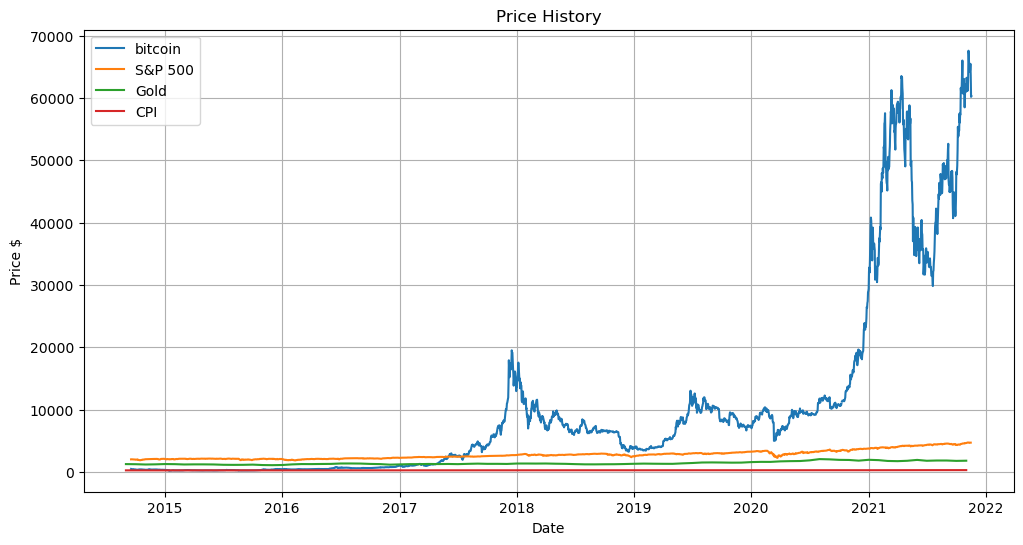

In [16]:
fig = plt.figure(figsize=(12,6))
plt.plot(bitcoin['date'], bitcoin['close'], label='bitcoin')
plt.plot(sp500['date'], sp500['close'], label='S&P 500')
plt.plot(gold_cpi['date'], gold_cpi['gold_usd'], label='Gold')
plt.plot(gold_cpi['date'], gold_cpi['cpi_us'], label='CPI')
plt.title('Price History')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.legend()
plt.grid()
plt.show()

## 4.0 Feature Engineering

## 5.0 Modeling / Training

## 6.0 Model Evaluation

## 7.0 Submissions

## 8.0 Conclusion

## 9.0 Recommendations

## References